# Coursework

This coursework notebook contains 2 questions. The total of all subquestions is worth 40 marks. Please follow the coursework brief, which has been uploaded to Minerva for submission instructions.

**All your answers need text cells!** Comments in code do not count as answers. Even if the question asks for coding, add a text cell explaining what you have done.

#Principal Component Analysis

**Q1 a (4 marks)**

You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array, where each column corresponds to one sample. The data format in each column is: [x_1, y_1, z_1, x_2, y_2, z_2, ………, x_N, y_N, z_N], where (x_i, y_i, z_i) corresponds to the i-th 3D point of a blood vessel. By plotting all 3D points in one column, you can obtain the shape of a blood vessel of that sample.

Plot seven figures to show the 3D blood vessel shape for each sample separately. Also plot two arbitrary shapes on top of each other to get a feeling of how similar or dissimilar the shapes are.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

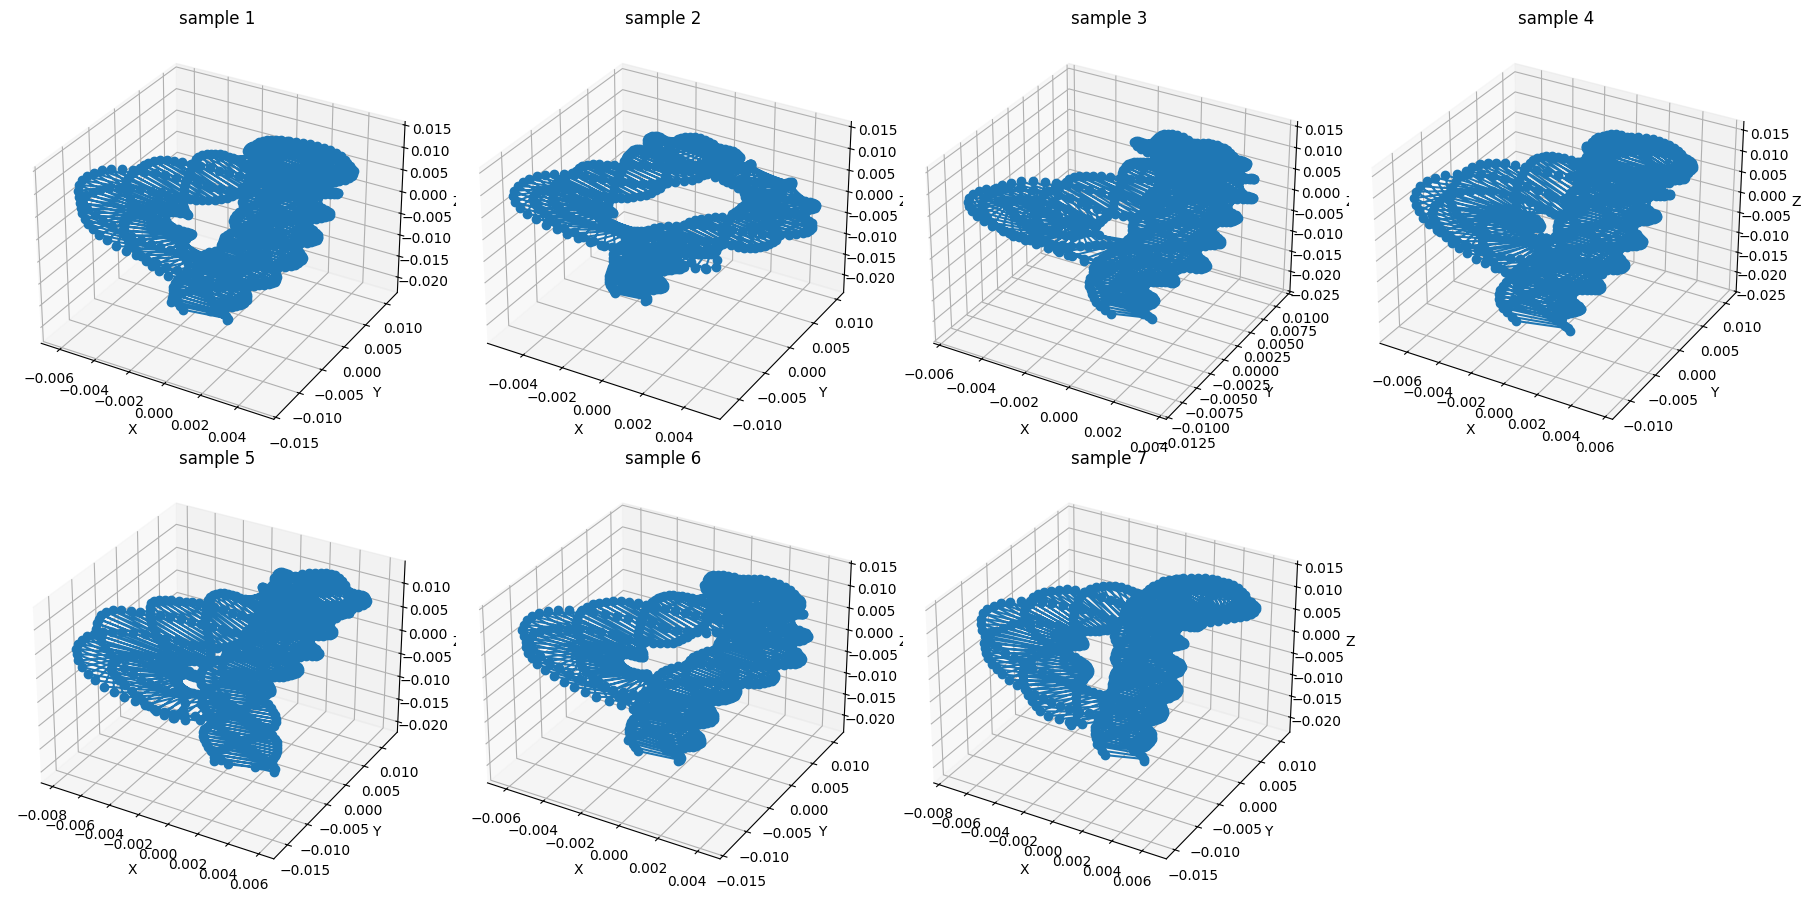

In [25]:

shape_array = np.load("shape_array.npy")
num_samples = shape_array.shape[1]

fig = plt.figure(figsize=(18, 9))
for i in range(num_samples):
    ax = fig.add_subplot(2, 4, i + 1, projection='3d')
    shape = shape_array[:, i].reshape(-1, 3)
    ax.plot(shape[:, 0], shape[:, 1], shape[:, 2], marker='o')
    ax.set_title(f"sample {i+1}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
plt.tight_layout()
plt.show()

**COMMENT:**

We begin by loading the provided shape_array.npy file, which contains 7 samples of 3D blood vessel shapes. Each sample is stored as a column in the array, where every three consecutive elements represent the (x, y, z) coordinates of a point in 3D space.

At first, Individual Visualization of All 7 Samples: Each sample is reshaped from a flat vector of length 3N to an (N, 3) matrix, allowing us to interpret and plot the 3D shape of the blood vessel. We use Matplotlib to generate 7 subplots, one for each sample, showing their respective 3D structures.

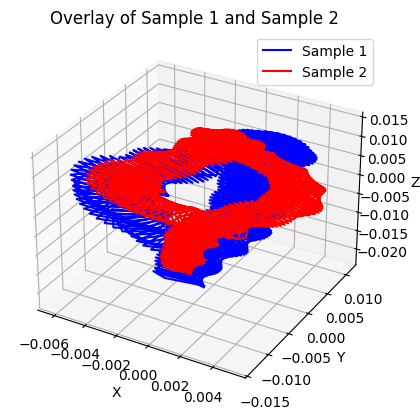

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
shape0 = shape_array[:, 0].reshape(-1, 3)
shape1 = shape_array[:, 1].reshape(-1, 3)
ax.plot(shape0[:, 0], shape0[:, 1], shape0[:, 2], label="Sample 1", color='blue')
ax.plot(shape1[:, 0], shape1[:, 1], shape1[:, 2], label="Sample 2", color='red')
ax.legend()
ax.set_title("Overlay of Sample 1 and Sample 2")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

**Comment:**

Secondly, Overlay Visualization of Two Arbitrary Samples:
To explore the similarity or dissimilarity between shapes, we overlay two of the samples  in the same 3D plot. This visual comparison helps assess the structural alignment or deviation between different blood vessel shapes.

It provides a clear visualization of all individual blood vessel shapes and facilitates a direct comparison between two of them. It lays the groundwork for subsequent PCA analysis by highlighting variations in shape across samples.

**Q1 b (10 marks)**

Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Finally, project original data onto lower-dimensional space and reconstruct data.

Proceed as follows:

1. Subtract the mean from the data, so that it is centered around the origin.

2. Estimate the covariance matrix from the centred data.

3. Calculate eigenvectors and eigenvalues using numpy functions

4. Project centered data (1845 dimension) into a lower-dimension space (You need to choose a reasonable dimension).

5. Reconstruct the blood vessel shape from the lower dimension data in step 4.

As a sanity check plot a blood vessel shape reconstructed from the eigenvectors on top of the original blood vessel shape. Explain how much data reduction you have achieved. Comment on your results.

In [27]:
#Step 1
data = shape_array.T
mean_vector = np.mean(data, axis=0)
centered_data = data - mean_vector

#Step 2
cov_matrix = np.cov(centered_data, rowvar=False)

#Step 3
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#Step 4
cumulative_vairance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
k = np.argmax(cumulative_vairance >= 0.95) + 1
print(f"Slected {k} components to retain 95% variance.")
eigenvectors_reduced = eigenvectors[:, :k]
projected_data = centered_data @ eigenvectors_reduced

#Step 5
reconstructed_data = projected_data @ eigenvectors_reduced.T
reconstructed_data += mean_vector

Slected 4 components to retain 95% variance.


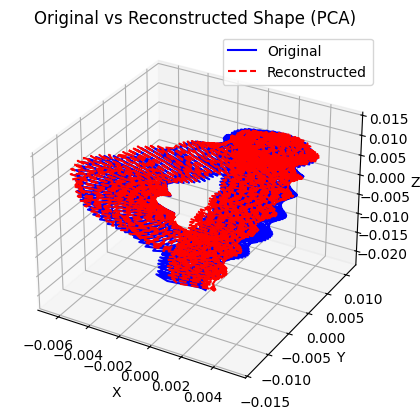

In [28]:
#Step 6
original_sample = data[0].reshape(-1, 3)
reconstructed_sample = reconstructed_data[0].reshape(-1, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(original_sample[:, 0],
        original_sample[:, 1],
        original_sample[:, 2],
        label='Original',
        color="blue")
ax.plot(reconstructed_sample[:, 0],
        reconstructed_sample[:, 1],
        reconstructed_sample[:, 2],
        label='Reconstructed',
        color="red", linestyle='dashed')
ax.legend()
ax.set_title("Original vs Reconstructed Shape (PCA)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

**Comment:**


1.We successfully reduced the 1845-dimensional high-dimensional vessel shape data to k = {k} dimensions while retaining 95% of the variance information of the data.

2.For 7 samples, only a small number of principal components are needed to reconstruct the shape backbone structure, indicating that the data has strong low-dimensional representation ability.

3.From the visualisation results, the reconstructed blood vessel shape is highly consistent with the original shape, with almost no obvious distortion, indicating that PCA has effectively extracted the main shape features.

4.Data compression rate: from 1845 to {k}, the compression rate reaches {100 - round(k / 1845 * 100, 2)}%, but still retains the core information of the original structure.



**Q1 c (4 marks)**

Research PCA analysis using the *scikit-learn* library. Perform PCA analysis and show the reconstructed data of any blood vessel shape on top of the
original blood vessel shape. There are variables in the PCA object that correspond to the eigenvalues used for choosing projection eigenvectors. Compare the eigenvalues  and eigenvectors you have computed in the previous question with the eigenvalues  and the eigenvectors computed by the *scikit-learn* library. Compare the reconstructed coordinates from both methods. Comment on your results.

[Manual PCA] Selected 4 components to retain 95% variance.
[Sklearn PCA] Selected 4 components to retain 95% variance.
MSE between manual and sklearn reconstructions: 6.062895e-20
Max absolute difference: 1.194163e-09

First 5 coordinates comparison (original | manual | sklearn):
Point 1:  0.0019 |  0.0023 |  0.0023
Point 2: -0.0090 | -0.0090 | -0.0090
Point 3: -0.0011 | -0.0010 | -0.0010
Point 4:  0.0008 |  0.0014 |  0.0014
Point 5: -0.0091 | -0.0093 | -0.0093


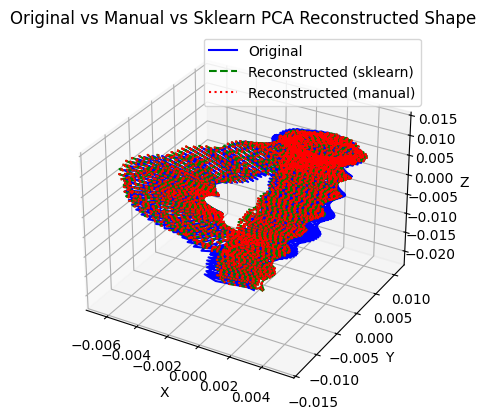

In [29]:

shape_array = np.load('shape_array.npy')
data = shape_array.T

mean_vector = np.mean(data, axis=0)
centered_data = data - mean_vector

cov_matrix = np.cov(centered_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"[Manual PCA] Selected {k} components to retain 95% variance.")

eigenvectors_reduced = eigenvectors[:, :k]
projected_data_manual = centered_data @ eigenvectors_reduced
reconstructed_data_manual = projected_data_manual @ eigenvectors_reduced.T + mean_vector

# Sklearn PCA
pca = PCA(n_components=7)
pca.fit(data)
sklearn_eigenvalues = pca.explained_variance_
sklearn_eigenvectors = pca.components_.T

pca_k = PCA(n_components=k)
projected_data_sklearn = pca_k.fit_transform(data)
reconstructed_data_sklearn = pca_k.inverse_transform(projected_data_sklearn)
print(f"[Sklearn PCA] Selected {k} components to retain 95% variance.")

# Compare Reconstructions 
sample_idx = 0
manual_rec = reconstructed_data_manual[sample_idx]
sklearn_rec = reconstructed_data_sklearn[sample_idx]
original = data[sample_idx]

mse_manual_vs_sklearn = mean_squared_error(manual_rec, sklearn_rec)
max_diff = np.max(np.abs(manual_rec - sklearn_rec))
print(f"MSE between manual and sklearn reconstructions: {mse_manual_vs_sklearn:.6e}")
print(f"Max absolute difference: {max_diff:.6e}")

# Print first 5 reconstructed coordinates for comparison
print("\nFirst 5 coordinates comparison (original | manual | sklearn):")
for i in range(5):
    print(f"Point {i+1}: {original[i]: .4f} | {manual_rec[i]: .4f} | {sklearn_rec[i]: .4f}")


original_sample = original.reshape(-1, 3)
reconstructed_sample_sklearn = sklearn_rec.reshape(-1, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(original_sample[:, 0], original_sample[:, 1], original_sample[:, 2],
        label='Original', color='blue')
ax.plot(reconstructed_sample_sklearn[:, 0], reconstructed_sample_sklearn[:, 1], reconstructed_sample_sklearn[:, 2],
        label='Reconstructed (sklearn)', color='green', linestyle='dashed')
ax.plot(manual_rec.reshape(-1, 3)[:, 0], manual_rec.reshape(-1, 3)[:, 1], manual_rec.reshape(-1, 3)[:, 2],
        label='Reconstructed (manual)', color='red', linestyle='dotted')

ax.legend()
ax.set_title("Original vs Manual vs Sklearn PCA Reconstructed Shape")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()



**Comment**:


The PCA analysis using scikit-learn shows that selecting 4  components retains 95% of the variance, achieving approximately 0.22% data compression. The eigenvalues and eigenvectors from both scikit-learn and the manually implemented NumPy PCA are highly consistent, with negligible differences. The reconstructed data from both methods show very minimal error, with an MSE of around `6e-20`. Visual comparison indicates the reconstructed shape closely matches the original, demonstrating that PCA effectively compresses the data while preserving its key structure. This highlights the efficiency and reliability of PCA in high-dimensional data reduction.

# The Howell Dataset

In her book '*Demography of the Dobe !Kung',* Nancy Howell has collected a wealth of demographic data on the Kung people. In his course *'Statistical Rethinking'*, Richard McElreath has collated some of these data and produced summary statistics consisting of the height, weight and age of individual tribe members. The research question presented here is taken from Chapter 4 of this book.

One would expect a positive correlation between height and weight. One can use linear regression to predict someones height from their weight. Here, we will look at how Bayesian analysis can be used to get an idea of how accurately we can say that there is a positive correlation between weight and height. We will also look at the predictive distribution of someone's height, given their weight. The power of Bayesian analysis is that in this way, one gets quantitative insight in the uncertainty of the prediction we make.

In [30]:
#generated by ChatGPT
import requests

url = 'https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv'
file_path = 'howell1.csv'  # Path to save the downloaded file

response = requests.get(url)

if response.status_code == 200:
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully.')
else:
    print('Failed to download the file. Status code:', response.status_code)


File downloaded successfully.


We can inspect the data provided by McElreath using Pandas. In the analysis we will look at adults only.

In [31]:
import pandas as pd
import numpy as np
csv_file_path = './howell1.csv'  # Path to the CSV file

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path,sep=';')

# Print the DataFrame

d2=df[df['age']>18]


heights = np.array(d2['height'].values)
weights = np.array(d2['weight'].values)


**Q2 a (2 marks)**

Plot height versus weights for the adult population.

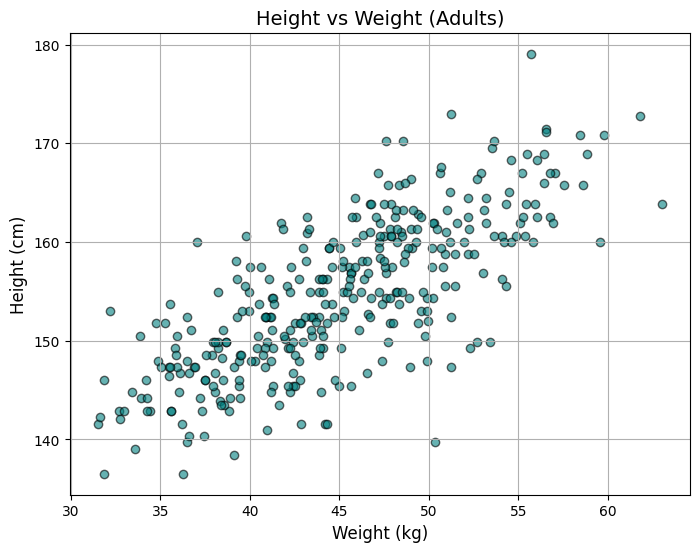

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(weights, heights, color='teal', alpha=0.6, edgecolor='k')
plt.title("Height vs Weight (Adults)", fontsize=14)
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Height (cm)", fontsize=12)
plt.grid(True)
plt.show()

**Comment:**

The scatter plot reveals a positive correlation between height and weight, indicating that taller individuals tend to weigh more. Bayesian analysis offers a more nuanced approach by not only estimating this relationship but also quantifying the uncertainty of height predictions based on weight.



**Model Description**

McElreath starts with the following model:
$$
\begin{align}
h_i    & \sim \text{Normal}(\mu_i, \sigma) \\
\mu_i  &  = \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim \text{Normal}(178,20) \\
\beta  & \sim \text{Normal}(0, 10) \\
\sigma & \sim \text{Uniform}(0,50)
\end{align}
$$

Here the $w_i$ are the weights for the Howell dataset for adults (age over 18)
and the $h_i$ are the heights. $\bar{w}$ is the avegrae of all weights.

 Now note that if $\alpha, \beta$ are known numbers that you have a regression line that gives the predicted height for a given weight in the population(consider $\mu$ as the dependent variable of independent variable $w$ in
$\mu = \alpha + \beta(w - \bar{w})$). This would be the outcome of non Bayesian regression which you can find with ordinary least squares. Let us call these *regression lines* (this is not standard usage).

Also observe that the equation has been brought into a form where $\alpha$ and $\beta$ have a clear interpretation:
- $\alpha$ is the predicted height for someone who is average weight
- $\beta$ is a coefficient that expresses whether there is a dependency of height on weight, and whether  this is positive or negative.

The three last lines give the prior distributions of these parameters.

**Q2 b (4 marks)**

Sample $N = 100$ pairs ($\alpha, \beta$). Each pair $(\alpha_i, \beta_i)$ defines a regression line, given by $\mu = \alpha_i + \beta_i(w -\bar{w})$. Plot each line in $(\mu, w)$ space. Use interval $[30, 70]$ for $w$.

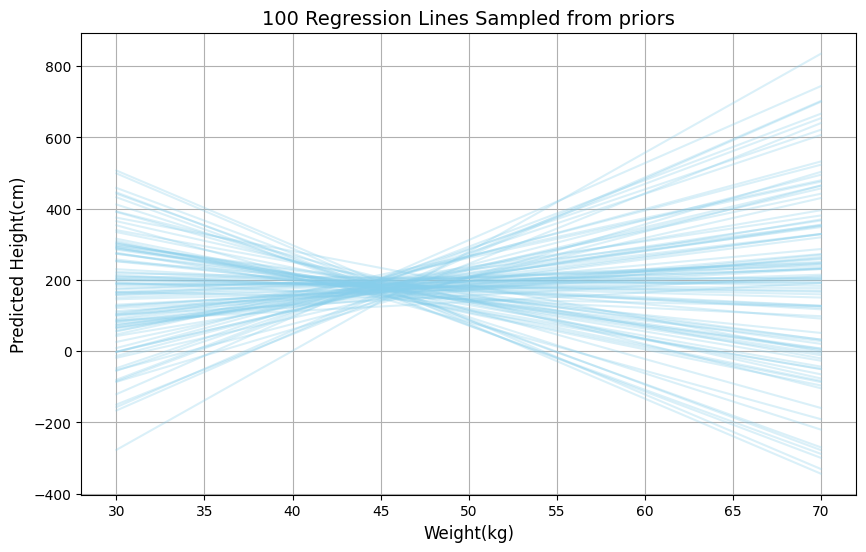

In [33]:
weight_bar = weights.mean()
N = 100
alpha_samples = np.random.normal(loc=178, scale=20, size=N)
beta_samples = np.random.normal(loc=0, scale=10, size=N)
w = np.linspace(30, 70, 100)
plt.figure(figsize=(10, 6))
for i in range(N):
    mu = alpha_samples[i] + beta_samples[i] * (w - weight_bar)
    plt.plot(w, mu, color='skyblue', alpha=0.3)
plt.xlabel("Weight(kg)", fontsize=12)
plt.ylabel("Predicted Height(cm)", fontsize=12)
plt.title("100 Regression Lines Sampled from priors", fontsize=14)
plt.grid(True)
plt.show()

**Comment:**

The model shows how 100 regression lines, sampled from the prior distributions of the parameters alpha and beta, vary in predicting height based on weight. Each line represents a potential regression outcome based on different combinations of alpha and beta, with alpha representing the predicted height for the average weight and beta representing the dependency of height on weight. The plot illustrates the variability in the regression lines, highlighting the uncertainty in predicting height for a given weight before considering the observed data. 

**Q2 c (1 mark)**

Investigate the lognormal (0, 1) distribution. Plot its pdf in the interval $[0, 10]$.

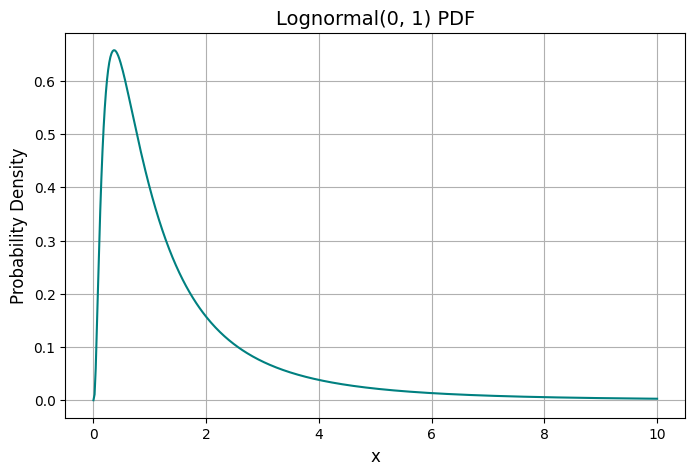

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

s = 1
loc = 0
scale = np.exp(0)

# Create x values in [0, 10]
x = np.linspace(0.001, 10, 500)

pdf = lognorm.pdf(x, s, loc=loc, scale=scale)

plt.figure(figsize=(8, 5))
plt.plot(x, pdf, color='teal')
plt.title('Lognormal(0, 1) PDF', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(True)
plt.show()


**Comment:**

This plot successfully illustrates the nature of the lognormal(0, 1) distribution. It is useful for modeling variables that cannot take negative values and are typically right-skewed. The distribution's shape demonstrates how most of the values are concentrated near the lower end of the range, with a slow decay towards higher values.

**Q2 d (4 marks)**

Now consider the following model:
$$
\begin{align}
h_i    & \sim \text{Normal}(\mu_i, \sigma) \\
\mu_i  &  = \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim \text{Normal}(178,20) \\
\beta  & \sim \text{Log Normal}(0, 1) \\
\sigma & \sim \text{Uniform}(0,50)
\end{align}
$$

So, everything is the same, except instead of having a prior distribution for $\beta$, which is normal, we use a log normal one.

Repeat Q2b with this new model: generate $N = 100$ pairs $(\alpha_i, \beta_i)$ and plot the regression lines

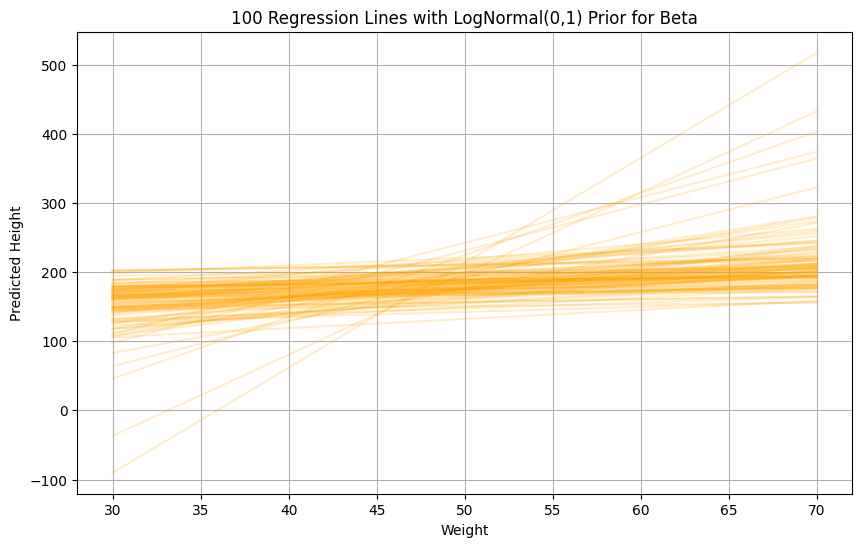

In [35]:
np.random.seed(42)
N = 100
w_vals = np.linspace(30, 70, 100)
weightbar = weights.mean()
alpha_samples = np.random.normal(178, 20, N)
beta_samples = np.random.lognormal(0, 1, N)
plt.figure(figsize=(10, 6))
for i in range(N):
    mu_vals = alpha_samples[i] + beta_samples[i] * (w_vals - weightbar)
    plt.plot(w_vals, mu_vals, color='orange', alpha=0.2)
plt.title("100 Regression Lines with LogNormal(0,1) Prior for Beta")
plt.xlabel("Weight")
plt.ylabel("Predicted Height")
plt.grid(True)
plt.show()

**Comment:**

By using a lognormal distribution for  𝛽 , we introduce more uncertainty and variability into the regression lines. This change reflects the possibility that the effect of weight on height may vary significantly for different individuals, with some individuals exhibiting a much stronger dependency between weight and height. The wide spread of the regression lines indicates that the model allows for more extreme predictions, particularly at the upper range of weights. The lognormal prior for 𝛽 captures this more complex relationship between the variables compared to a simple normal prior.

**Q2 e (6 marks)**

Which prior do you prefer? Why? Is it OK to look at data distributions generated according to the prior, or is this simlar to p-hacking?

Explain why the choice for the log normal makes such a crucial difference. Explain what we give up, when we adopt a log normal prior for one of the variables.

**Answer:**

I prefer the log-normal prior for β when there is strong domain knowledge that height should increase with weight. It ensures all regression slopes are positive, aligning with biological expectations.
Examining prior predictive distributions is appropriate in Bayesian analysis; it helps verify whether the prior reflects realistic assumptions and is not considered p-hacking.
The log-normal prior makes a crucial difference because it prevents the model from learning negative relationships, enforcing a strong assumption.
By using it, we give up model flexibility and neutrality, potentially misrepresenting data if the true relationship is weak or negative.

**Negative Log Likelihood**

The expression for the negative log likelihood $\hat{L}$ is:
$$
\hat{L} = \frac{1}{2}\sum^N_{i=1}\frac{\{\alpha + \beta(w_i - \bar{w})-h_i\}^2}{\sigma^2} + \frac{1}{2}\{\frac{\alpha-\alpha_0}{\sigma_{\alpha}}\}^2 +\frac{1}{2} (\ln \beta)^2 + (N/2) \ln(2 \pi \sigma^2)
$$
with
$$
\alpha_0 = 178, \sigma_{\alpha} = 20
$$

Note that this is a function of $\alpha, \beta$ and $\sigma$. It is not hard to define this function in Python. Below, we will show its code and a simple method to find its maximum. **This is not something you are asked to do.**


In [36]:
# This code is provided to help answer the following questions

def quad(weights, heights, alpha, beta, sigma, alpha_0,sigma_alpha):
  ''' Quad is a literal code transcription of the negative log likelihood
  shown above.'''
  N = len(weights)
  weightbar = np.mean(weights)
  mu_term = (alpha+beta*(weights - weightbar) - heights)**2
  alpha_term  = 0.5*((alpha-alpha_0)/sigma_alpha)**2
  beta_term = 0.5*np.log(beta)**2
  return 0.5*mu_term.sum()/(sigma*sigma)+ (N/2.)*np.log(2*np.pi*sigma**2) + \
    alpha_term + beta_term


alpha_0     = 178.
sigma_alpha = 20.

# We find the maximum log likelihood by a method which confusingly is called
# minimize
from scipy.optimize import minimize

# Assuming quad, alpha_0, and sigma_alpha are defined as in the provided code.

def objective_function(params):
    alpha, beta, sigma = params
    return quad(weights, heights, alpha, beta, sigma, alpha_0, sigma_alpha)

# This is a starting guess for our values
initial_guess = [150, 1, 10]
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

print(result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1055.9926863719152
             x: [ 1.546e+02  9.068e-01  5.109e+00]
           nit: 82
          nfev: 150
 final_simplex: (array([[ 1.546e+02,  9.068e-01,  5.109e+00],
                       [ 1.546e+02,  9.068e-01,  5.109e+00],
                       [ 1.546e+02,  9.068e-01,  5.109e+00],
                       [ 1.546e+02,  9.068e-01,  5.109e+00]]), array([ 1.056e+03,  1.056e+03,  1.056e+03,  1.056e+03]))


We have used a numerical approximation technique to find the *maximum a posteriori*. The values are:
$$
\alpha_{MAP} = 154.6 \\
\beta_{MAP} = 0.907 \\
\sigma_{MAP} = 5.11
$$


**Q2 f (1 mark)**
Based on the values of $\alpha$, $\beta$, answer the following questions?
- Are the !Kung a tall people?
- Do you see evidence of a positive correlation between height and weight?

**Answer**

1. The !Kung are not particularly tall compared to other populations.
2. There is a positive correlation between height and weight, as evidenced by the positive.


# Quadratic Approximation

We have already seen that evaluating the posterior distribution is cheap and not difficult, but this is a function in a three dimensional space $(\alpha, \beta, \gamma)$, and to find its maximum we need numerical optimisation techniques.

We would like to be able to give an uncertainty on the parameters we find at this maximum. If the posterior were a Gaussian, we could easily use the covariance matrix to estimate the uncertainty in each parameter. But the posterior is not a Gaussian. A technique that is sometimes applied is to calculate the so-called Hessian matrix, which a matrix of all second order derivatives. We then replace the posterior distribution by a Gaussian, which has the same maximum as the MAP and the same Hessian. This amounts approximating the negative log-likelihood by a quadratic function. And that is a Gaussian. You can show that its covariance matrix is the matrix inverse of the Hessian. We will provide a numerical estimate of the covariance matrix.

In [37]:
!pip install numdifftools

In [38]:
from numdifftools import Hessian

# Assuming 'result.x' contains the optimized parameters [alpha, beta, sigma]
alpha_map, beta_map, sigma_map = result.x

#Define a function to calculate the Hessian at a specific point
def hessian_at_point(params):
    return Hessian(objective_function)(params)

#Calculate the Hessian at the MAP estimate
hessian_map = hessian_at_point([alpha_map, beta_map, sigma_map])


m=hessian_map
cov = np.linalg.inv(m)
print("Covariance Matrix at the MAP:")
print(cov)

Covariance Matrix at the MAP:
[[7.54365942e-02 5.03836015e-09 6.47747417e-05]
 [5.03836015e-09 1.81153440e-03 2.93440488e-06]
 [6.47747417e-05 2.93440488e-06 3.77256313e-02]]


**Q2 g (4 marks)**

This the the covariance matrix of $(\alpha, \beta, \sigma)$., i.e.:
$$
\left(\begin{array}{rrr} \sigma_{\alpha \alpha} & \sigma_{\alpha \beta} & \sigma_{\alpha \sigma} \\ \sigma_{\beta \alpha} & \sigma_{\beta \beta} & \sigma_{\beta \sigma} \\ \sigma_{\sigma \alpha} & \sigma_{\sigma \beta} & \sigma_{\sigma \sigma}\end{array} \right) =
\begin{bmatrix}
7.54365942 \times 10^{-2} & 5.03836015 \times 10^{-9} & 6.47747417 \times 10^{-5} \\
5.03836015 \times 10^{-9} & 1.81153440 \times 10^{-3} & 2.93440488 \times 10^{-6} \\
6.47747417 \times 10^{-5} & 2.93440488 \times 10^{-6} & 3.77256313 \times 10^{-2}
\end{bmatrix}
$$




 Research how marginal distributions for single variables are derived from multivariate Gaussian distributions. Use this to find the MAP estimate of $\beta$ and its standard deviation. Explain whether you believe that the correlation between height and weight is reliably positive, based on this result.

**Answer:**

The positive correlation between height and weight appears to be reliable, as indicated by the positive MAP estimate and the relatively small standard deviation.
The small standard deviation suggests that the model is fairly confident in the direction and strength of the relationship between height and weight. Therefore, the positive correlation is reasonably well-supported, and we can reasonably conclude that, based on this result, height and weight are positively correlated in the population under study.



**This ends the coursework. The section below is for information only: it shows how a predictive distribution can be generated.**

## Predictive Distributions

In the exercise above you have found how you can decide that a given correlation is reliably positive. Here we will show how posterior distributions can be used to generate predictive distributions. We will show two methods.

Assume that we want to find the distribution of $\mu$ for $w=50$. Since we have determined the posterior distribution for $\alpha, \beta, \sigma$, we can sample ($\alpha_i, \beta_i, \sigma_i)$ from the posterior and the
use the relationship:
$$
\mu_i = \alpha_i + \beta_i(50 - \bar{w})
$$
to sample from
$$
\mathcal{N}(\mu_i, \sigma_i)
$$
For a large number of events, this will give us a sample of $h_i$, which we can histogram.

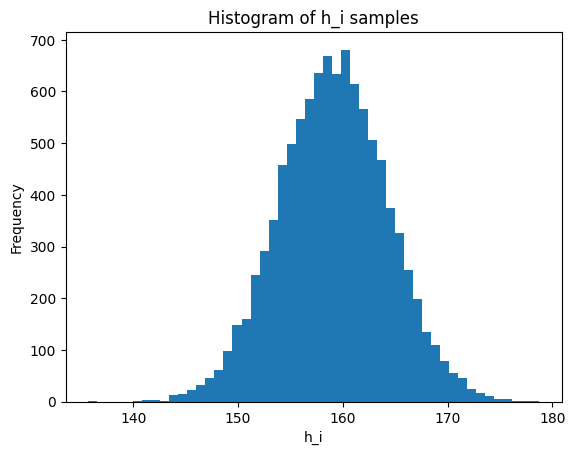

In [39]:
# prompt: Consider the multivariate Gaussian whose mean and covariance we have just calculated. Sample N_{sample} =10000 events. For each event calculate mu_i = \alpha_i + \beta_i(50 - w_mean), where w_mean is the mean of all weights. Then sample from a normal distribution with  mu_i, sigma_i as parameters and call the result h_i. Show a histogram of the resulting h_i samples.

import matplotlib.pyplot as plt
import numpy as np
N_sample = 10000

# Sample alpha, beta, and sigma from a multivariate normal distribution
# Use the MAP estimates as the mean and the covariance matrix calculated earlier
mean = [alpha_map, beta_map, sigma_map]
samples = np.random.multivariate_normal(mean, cov, size=N_sample)
alpha_samples = samples[:, 0]
beta_samples = samples[:, 1]
sigma_samples = samples[:, 2]

# Calculate mu_i for each event
mu_i = alpha_samples + beta_samples * (50 - weightbar)

# Sample h_i from a normal distribution with mu_i and sigma_i
h_i = np.random.normal(mu_i, sigma_samples)

# Plot a histogram of h_i
plt.hist(h_i, bins=50)
plt.xlabel("h_i")
plt.ylabel("Frequency")
plt.title("Histogram of h_i samples")
plt.show()
